In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv('hd_activitybyca.csv')
df

,FinancialYear,CA,CAQF,AdmissionType,AdmissionTypeQF,AgeGroup,AgeGroupQF,Sex,SexQF,Diagnosis,NumberOfDischarges,NumberOfDischargesQF,CrudeRate,CrudeRateQF,EASR
0,2012/13,S92000003,d,All,d,0-44 years,NaN,Males,NaN,Coronary Heart Disease,1262.0,NaN,86.288297,NaN,91.428011
1,2012/13,S92000003,d,All,d,0-44 years,NaN,Females,NaN,Coronary Heart Disease,420.0,NaN,28.602015,NaN,28.710033
2,2012/13,S92000003,d,All,d,45-64 years,NaN,Males,NaN,Coronary Heart Disease,12956.0,NaN,1820.222793,NaN,1843.575545
3,2012/13,S92000003,d,All,d,45-64 years,NaN,Females,NaN,Coronary Heart Disease,4376.0,NaN,587.295047,NaN,595.305387
4,2012/13,S92000003,d,All,d,65-74 years,NaN,Males,NaN,Coronary Heart Disease,8991.0,NaN,3762.255261,NaN,3814.434332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95035,2021/22,S12000050,NaN,Transfer,NaN,0-44 years,NaN,All,d,Angina,NaN,c,NaN,c,2.305725
95036,2021/22,S12000050,NaN,Transfer,NaN,45-64 years,NaN,All,d,Angina,NaN,c,NaN,c,113.367874
95037,2021/22,S12000050,NaN,Transfer,NaN,65-74 years,NaN,All,d,Angina,NaN,c,NaN,c,128.115149
95038,2021/22,S12000050,NaN,Transfer,NaN,75plus years,NaN,All,d,Angina,NaN,c,NaN,c,211.118385


In [3]:
df = df.drop(['CAQF', 'AdmissionTypeQF', 'AgeGroupQF', 'SexQF', 'NumberOfDischargesQF', 'CrudeRateQF'], axis=1)
df
# EASR  = Excess Admissions Standardized Rate

,FinancialYear,CA,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,CrudeRate,EASR
0,2012/13,S92000003,All,0-44 years,Males,Coronary Heart Disease,1262.0,86.288297,91.428011
1,2012/13,S92000003,All,0-44 years,Females,Coronary Heart Disease,420.0,28.602015,28.710033
2,2012/13,S92000003,All,45-64 years,Males,Coronary Heart Disease,12956.0,1820.222793,1843.575545
3,2012/13,S92000003,All,45-64 years,Females,Coronary Heart Disease,4376.0,587.295047,595.305387
4,2012/13,S92000003,All,65-74 years,Males,Coronary Heart Disease,8991.0,3762.255261,3814.434332
...,...,...,...,...,...,...,...,...,...
95035,2021/22,S12000050,Transfer,0-44 years,All,Angina,NaN,NaN,2.305725
95036,2021/22,S12000050,Transfer,45-64 years,All,Angina,NaN,NaN,113.367874
95037,2021/22,S12000050,Transfer,65-74 years,All,Angina,NaN,NaN,128.115149
95038,2021/22,S12000050,Transfer,75plus years,All,Angina,NaN,NaN,211.118385


In [4]:
df[df.isnull().any(axis=1)]
df2 = df.dropna()
df2

,FinancialYear,CA,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,CrudeRate,EASR
0,2012/13,S92000003,All,0-44 years,Males,Coronary Heart Disease,1262.0,86.288297,91.428011
1,2012/13,S92000003,All,0-44 years,Females,Coronary Heart Disease,420.0,28.602015,28.710033
2,2012/13,S92000003,All,45-64 years,Males,Coronary Heart Disease,12956.0,1820.222793,1843.575545
3,2012/13,S92000003,All,45-64 years,Females,Coronary Heart Disease,4376.0,587.295047,595.305387
4,2012/13,S92000003,All,65-74 years,Males,Coronary Heart Disease,8991.0,3762.255261,3814.434332
...,...,...,...,...,...,...,...,...,...
95021,2021/22,S12000047,Transfer,All,All,Angina,133.0,35.492221,33.503155
95023,2021/22,S12000048,Transfer,0-44 years,All,Angina,0.0,0.000000,0.000000
95027,2021/22,S12000048,Transfer,All,All,Angina,71.0,46.160848,37.820591
95033,2021/22,S12000049,Transfer,All,All,Angina,205.0,32.276857,44.132474


In [5]:
df_CHD = df2[df2['Diagnosis'] == 'Coronary Heart Disease'] 
df_CHD2022 = df_CHD[df_CHD['FinancialYear'] == '2021/22'] 
df_CHD2022

,FinancialYear,CA,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,CrudeRate,EASR
9504,2021/22,S92000003,All,0-44 years,Males,Coronary Heart Disease,960.0,65.389082,72.583004
9505,2021/22,S92000003,All,0-44 years,Females,Coronary Heart Disease,404.0,27.904811,29.856538
9506,2021/22,S92000003,All,45-64 years,Males,Coronary Heart Disease,12192.0,1694.072137,1633.600207
9507,2021/22,S92000003,All,45-64 years,Females,Coronary Heart Disease,4519.0,586.548708,567.653489
9508,2021/22,S92000003,All,65-74 years,Males,Coronary Heart Disease,9387.0,3298.765467,3296.712973
...,...,...,...,...,...,...,...,...,...
23735,2021/22,S12000045,Transfer,All,All,Coronary Heart Disease,515.0,472.910927,419.230792
23741,2021/22,S12000047,Transfer,All,All,Coronary Heart Disease,1277.0,340.778694,324.141013
23747,2021/22,S12000048,Transfer,All,All,Coronary Heart Disease,680.0,442.103894,374.622247
23753,2021/22,S12000049,Transfer,All,All,Coronary Heart Disease,3380.0,532.174515,704.754607


In [6]:
df_CHD2022_age = df_CHD2022[df_CHD2022["AgeGroup"].str.contains("All") == False]
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["AgeGroup"].str.contains("under75 years") == False] 
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["Sex"].str.contains("Males") == False]
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["Sex"].str.contains("Females") == False] 
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["AdmissionType"].str.contains("Elective") == False]
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["AdmissionType"].str.contains("Emergency") == False]
df_CHD2022_age = df_CHD2022_age[df_CHD2022_age["AdmissionType"].str.contains("Transfer") == False]
df_CHD2022_age

,FinancialYear,CA,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,CrudeRate,EASR
22969,2021/22,S92000003,All,0-44 years,All,Coronary Heart Disease,1364.0,46.777786,51.219771
22970,2021/22,S92000003,All,45-64 years,All,Coronary Heart Disease,16711.0,1121.449543,1100.626848
22971,2021/22,S92000003,All,65-74 years,All,Coronary Heart Disease,13708.0,2301.629677,2340.778431
22972,2021/22,S92000003,All,75plus years,All,Coronary Heart Disease,14493.0,3030.214329,3160.032659


In [22]:
df_2022 = df2[df2['FinancialYear'] == '2021/22'] 
df2_age = df_2022[df_2022["AgeGroup"].str.contains("All") == False]
df2_age = df2_age[df2_age["AgeGroup"].str.contains("under75 years") == False] 
df2_age = df2_age[df2_age["Sex"].str.contains("Males") == False]
df2_age = df2_age[df2_age["Sex"].str.contains("Females") == False] 
df2_age = df2_age[df2_age["AdmissionType"].str.contains("Elective") == False]
df2_age = df2_age[df2_age["AdmissionType"].str.contains("Emergency") == False]
df2_age = df2_age[df2_age["AdmissionType"].str.contains("Transfer") == False]
df2_age

,FinancialYear,CA,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,CrudeRate,EASR
22969,2021/22,S92000003,All,0-44 years,All,Coronary Heart Disease,1364.0,46.777786,51.219771
22970,2021/22,S92000003,All,45-64 years,All,Coronary Heart Disease,16711.0,1121.449543,1100.626848
22971,2021/22,S92000003,All,65-74 years,All,Coronary Heart Disease,13708.0,2301.629677,2340.778431
22972,2021/22,S92000003,All,75plus years,All,Coronary Heart Disease,14493.0,3030.214329,3160.032659
46729,2021/22,S92000003,All,0-44 years,All,Heart Attack,828.0,28.395899,31.152075
46730,2021/22,S92000003,All,45-64 years,All,Heart Attack,9077.0,609.143528,599.746163
46731,2021/22,S92000003,All,65-74 years,All,Heart Attack,6970.0,1170.291717,1188.609204
46732,2021/22,S92000003,All,75plus years,All,Heart Attack,8562.0,1790.153528,1860.986497
46819,2021/22,S12000027,All,0-44 years,All,Heart Attack,0.0,0.000000,0.000000
70489,2021/22,S92000003,All,0-44 years,All,Heart Failure,329.0,11.282912,12.027011


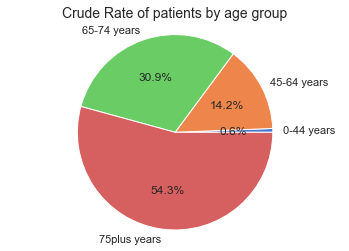

In [31]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette = 'muted')
chd = df2_age[['AgeGroup', 'CrudeRate']]
chd = chd.groupby(['AgeGroup'], as_index=False).sum()
chd

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format

percentage = chd['CrudeRate'].value_counts()
plt.pie(chd['CrudeRate'], labels = chd['AgeGroup'], autopct=autopct_format(percentage))
plt.axis('equal')
plt.title('Crude Rate of patients by age group', fontsize = 14)
plt.show()

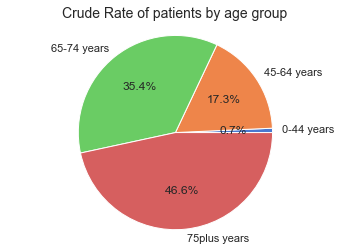

In [7]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette = 'muted')
chd = df_CHD2022_age[['AgeGroup', 'CrudeRate']]

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format

percentage = chd['CrudeRate'].value_counts()
plt.pie(chd['CrudeRate'], labels = chd['AgeGroup'], autopct=autopct_format(percentage))
plt.axis('equal')
plt.title('Crude Rate of patients by age group', fontsize = 14)
plt.show()

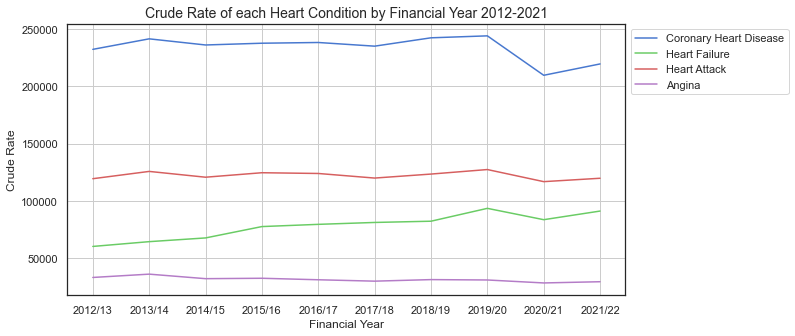

In [46]:
rate_year = df2[['FinancialYear', 'CrudeRate', 'Diagnosis']]
rate_year['Diagnosis'].unique()

CHD = rate_year.loc[df['Diagnosis']=='Coronary Heart Disease'] 
CHD = CHD.groupby(['FinancialYear']).sum().reset_index()

HA = rate_year.loc[df['Diagnosis']=='Heart Attack'] 
HA = HA.groupby(['FinancialYear']).sum().reset_index()

HF = rate_year.loc[df['Diagnosis']=='Heart Failure'] 
HF = HF.groupby(['FinancialYear']).sum().reset_index()

angina = rate_year.loc[df['Diagnosis']=='Angina'] 
angina = angina.groupby(['FinancialYear']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(CHD['FinancialYear'], CHD['CrudeRate'], label = 'Coronary Heart Disease')
plt.plot(HF['FinancialYear'], HF['CrudeRate'], label = 'Heart Failure')
plt.plot(HA['FinancialYear'], HA['CrudeRate'], label = 'Heart Attack')
plt.plot(angina['FinancialYear'], angina['CrudeRate'], label = 'Angina')
plt.title('Crude Rate of each Heart Condition by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Crude Rate')
plt.xlabel('Financial Year')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

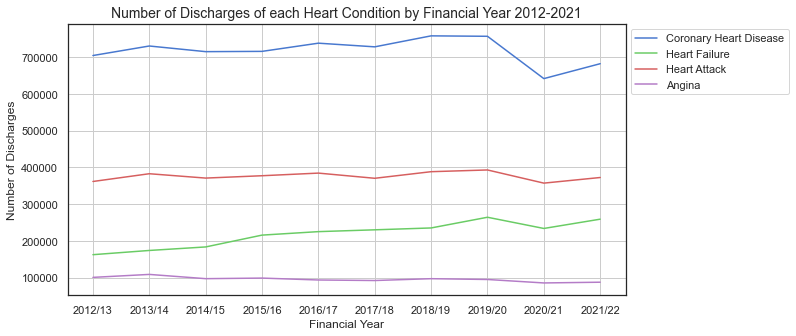

In [49]:
rate_year1 = df2[['FinancialYear', 'NumberOfDischarges', 'Diagnosis']]

CHD = rate_year1.loc[df['Diagnosis']=='Coronary Heart Disease'] 
CHD = CHD.groupby(['FinancialYear']).sum().reset_index()

HA = rate_year1.loc[df['Diagnosis']=='Heart Attack'] 
HA = HA.groupby(['FinancialYear']).sum().reset_index()

HF = rate_year1.loc[df['Diagnosis']=='Heart Failure'] 
HF = HF.groupby(['FinancialYear']).sum().reset_index()

angina = rate_year1.loc[df['Diagnosis']=='Angina'] 
angina = angina.groupby(['FinancialYear']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(CHD['FinancialYear'], CHD['NumberOfDischarges'], label = 'Coronary Heart Disease')
plt.plot(HF['FinancialYear'], HF['NumberOfDischarges'], label = 'Heart Failure')
plt.plot(HA['FinancialYear'], HA['NumberOfDischarges'], label = 'Heart Attack')
plt.plot(angina['FinancialYear'], angina['NumberOfDischarges'], label = 'Angina')
plt.title('Number of Discharges of each Heart Condition by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Number of Discharges')
plt.xlabel('Financial Year')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

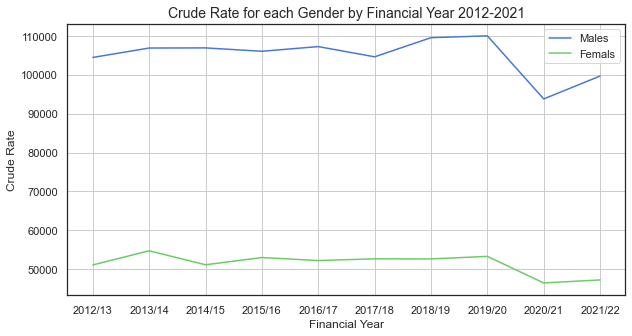

In [10]:
rate_year2 = df_CHD[['FinancialYear', 'Sex', 'CrudeRate']]
rate_year2
rate_year_male = rate_year2.loc[df['Sex']=='Males'] 
rate_year_male = rate_year_male.groupby(['FinancialYear']).sum().reset_index()
rate_year_female = rate_year2.loc[df['Sex']=='Females'] 
rate_year_female = rate_year_female.groupby(['FinancialYear']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(rate_year_male['FinancialYear'], rate_year_male['CrudeRate'], label = 'Males')
plt.plot(rate_year_female['FinancialYear'], rate_year_female['CrudeRate'], label = 'Femals')
plt.title('Crude Rate for each Gender by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Crude Rate')
plt.xlabel('Financial Year')
plt.grid()
plt.legend()
plt.show()

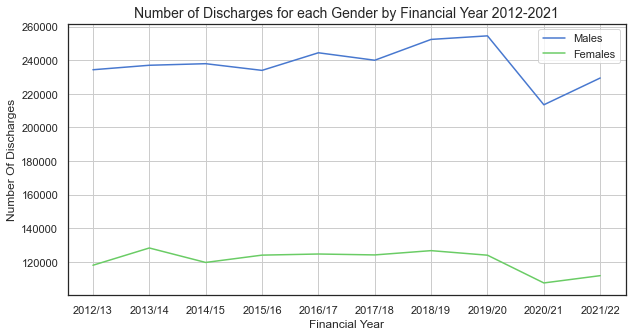

In [11]:
rate_year2 = df_CHD[['FinancialYear', 'Sex', 'NumberOfDischarges']]
rate_year2
rate_year_male = rate_year2.loc[df['Sex']=='Males'] 
rate_year_male = rate_year_male.groupby(['FinancialYear']).sum().reset_index()
rate_year_female = rate_year2.loc[df['Sex']=='Females'] 
rate_year_female = rate_year_female.groupby(['FinancialYear']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(rate_year_male['FinancialYear'], rate_year_male['NumberOfDischarges'], label = 'Males')
plt.plot(rate_year_female['FinancialYear'], rate_year_female['NumberOfDischarges'], label = 'Females')
plt.title('Number of Discharges for each Gender by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Number Of Discharges')
plt.xlabel('Financial Year')
plt.grid()
plt.legend()
plt.show()

In [12]:
rate_year3 = df_CHD[['FinancialYear', 'Sex', 'NumberOfDischarges', 'CrudeRate']]

rate_year_male1 = rate_year3.loc[df['Sex']=='Males'] 
rate_year_male1 = rate_year_male1.groupby(['FinancialYear']).sum().reset_index()
rate_year_female1 = rate_year3.loc[df['Sex']=='Females'] 
rate_year_female1 = rate_year_female1.groupby(['FinancialYear']).sum().reset_index()

rate_year_male1['discharges/rate'] = rate_year_male1['NumberOfDischarges']/rate_year_male1['CrudeRate']
rate_year_female1['discharges/rate'] = rate_year_female1['NumberOfDischarges']/rate_year_female1['CrudeRate']
rate_year_male1

# sns.set_theme(style="white", palette = 'muted')
# plt.figure(figsize=(10,5))
# plt.style.use("seaborn-muted")
# plt.plot(rate_year_male1['FinancialYear'], rate_year_male1['discharges/rate'], label = 'Males')
# plt.plot(rate_year_female1['FinancialYear'], rate_year_female1['discharges/rate'], label = 'Females')
# plt.title('Number of Discharges by Financial Year 2012-2021', fontsize = 14)
# plt.ylabel('Number Of Discharges over Crude Rate')
# plt.xlabel('Financial Year')
# plt.grid()
# plt.legend()
# plt.show()

,FinancialYear,NumberOfDischarges,CrudeRate,discharges/rate
0,2012/13,234386.0,104464.913955,2.243682
1,2013/14,237056.0,106880.045434,2.217963
2,2014/15,237992.0,106915.437697,2.225983
3,2015/16,234012.0,106045.417393,2.206715
4,2016/17,244494.0,107253.283299,2.279595
5,2017/18,240050.0,104624.950670,2.294386
6,2018/19,252452.0,109544.331916,2.304565
7,2019/20,254572.0,110013.767338,2.314001
8,2020/21,213514.0,93789.840842,2.276515
9,2021/22,229470.0,99679.786737,2.302072


<AxesSubplot:>

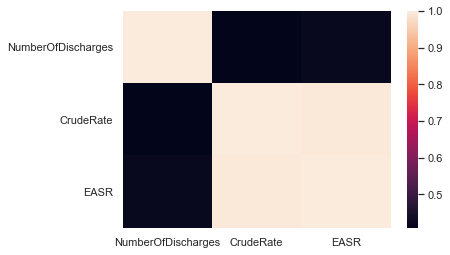

In [13]:
sns.heatmap(df2.corr())

EASR and Crude rate are perfectly correlated.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

corr = df2[['EASR', 'NumberOfDischarges', 'CrudeRate', 'Sex']]
corr = corr.loc[(corr['Sex']=='Males') | (corr['Sex']=='Females')] 
corr['Sex'] = corr["Sex"].replace({"Males": 0, "Females": 1})
target = corr[['Sex']]
x_train, x_test, y_train, y_test = train_test_split(corr, target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(x_train, y_train)

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
predictions = logisticRegr.predict(x_test)
predictions

score = logisticRegr.score(x_train, y_train)
score2 = logisticRegr.score(x_test, y_test)
score2

1.0

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2227    0]
 [   0 2567]]


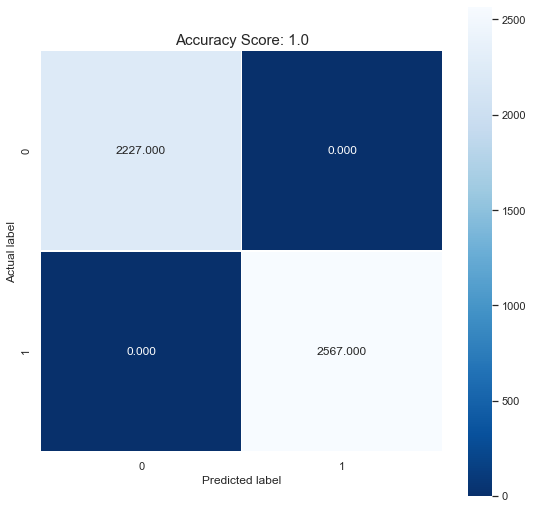

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [20]:
from sklearn.metrics import classification_report
target_names = ['Males', 'Females']
y_pred = predictions
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Males       1.00      1.00      1.00      2227
     Females       1.00      1.00      1.00      2567

    accuracy                           1.00      4794
   macro avg       1.00      1.00      1.00      4794
weighted avg       1.00      1.00      1.00      4794

